In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [21]:
cars=pd.read_csv("H:\\Data Science Assignments\\Data Science Assignments\\Multi linear Regression\\ToyotaCorolla.csv",encoding='latin1')

In [22]:
cars

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [27]:
cars.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [28]:
cars1= cars[['Model','Price','Age_08_04','Mfg_Year','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]

In [29]:
cars1.head()

,Model,Price,Age_08_04,Mfg_Year,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,2002,46986,90,2000,3,5,210,1165
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,2002,72937,90,2000,3,5,210,1165
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,2002,41711,90,2000,3,5,210,1165
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,2002,48000,90,2000,3,5,210,1165
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,2002,38500,90,2000,3,5,210,1170


In [30]:
cars2=cars1.rename({'Age_08_04':'Age','Quarterly_Tax':'QT'},axis=1)

In [31]:
cars2

,Model,Price,Age,Mfg_Year,KM,HP,cc,Doors,Gears,QT,Weight
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,2002,46986,90,2000,3,5,210,1165
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,2002,72937,90,2000,3,5,210,1165
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,2002,41711,90,2000,3,5,210,1165
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,2002,48000,90,2000,3,5,210,1165
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,2002,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,1998,20544,86,1300,3,5,69,1025
1432,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,1998,19000,86,1300,3,5,69,1015
1433,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,1998,17016,86,1300,3,5,69,1015
1434,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,1998,16916,86,1300,3,5,69,1015


In [32]:
cars1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Model          1436 non-null   object
 1   Price          1436 non-null   int64 
 2   Age_08_04      1436 non-null   int64 
 3   Mfg_Year       1436 non-null   int64 
 4   KM             1436 non-null   int64 
 5   HP             1436 non-null   int64 
 6   cc             1436 non-null   int64 
 7   Doors          1436 non-null   int64 
 8   Gears          1436 non-null   int64 
 9   Quarterly_Tax  1436 non-null   int64 
 10  Weight         1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [33]:
cars1.isna().sum()

Model            0
Price            0
Age_08_04        0
Mfg_Year         0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [34]:
cars3=cars2.drop("Mfg_Year",axis=1)

In [35]:
cars4=cars3.drop("Model",axis=1)

In [36]:
cars4

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [37]:
cars4[cars4.duplicated()]

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [38]:
cars5=cars4.drop_duplicates().reset_index(drop=True)

In [39]:
cars5

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [40]:
cars5.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


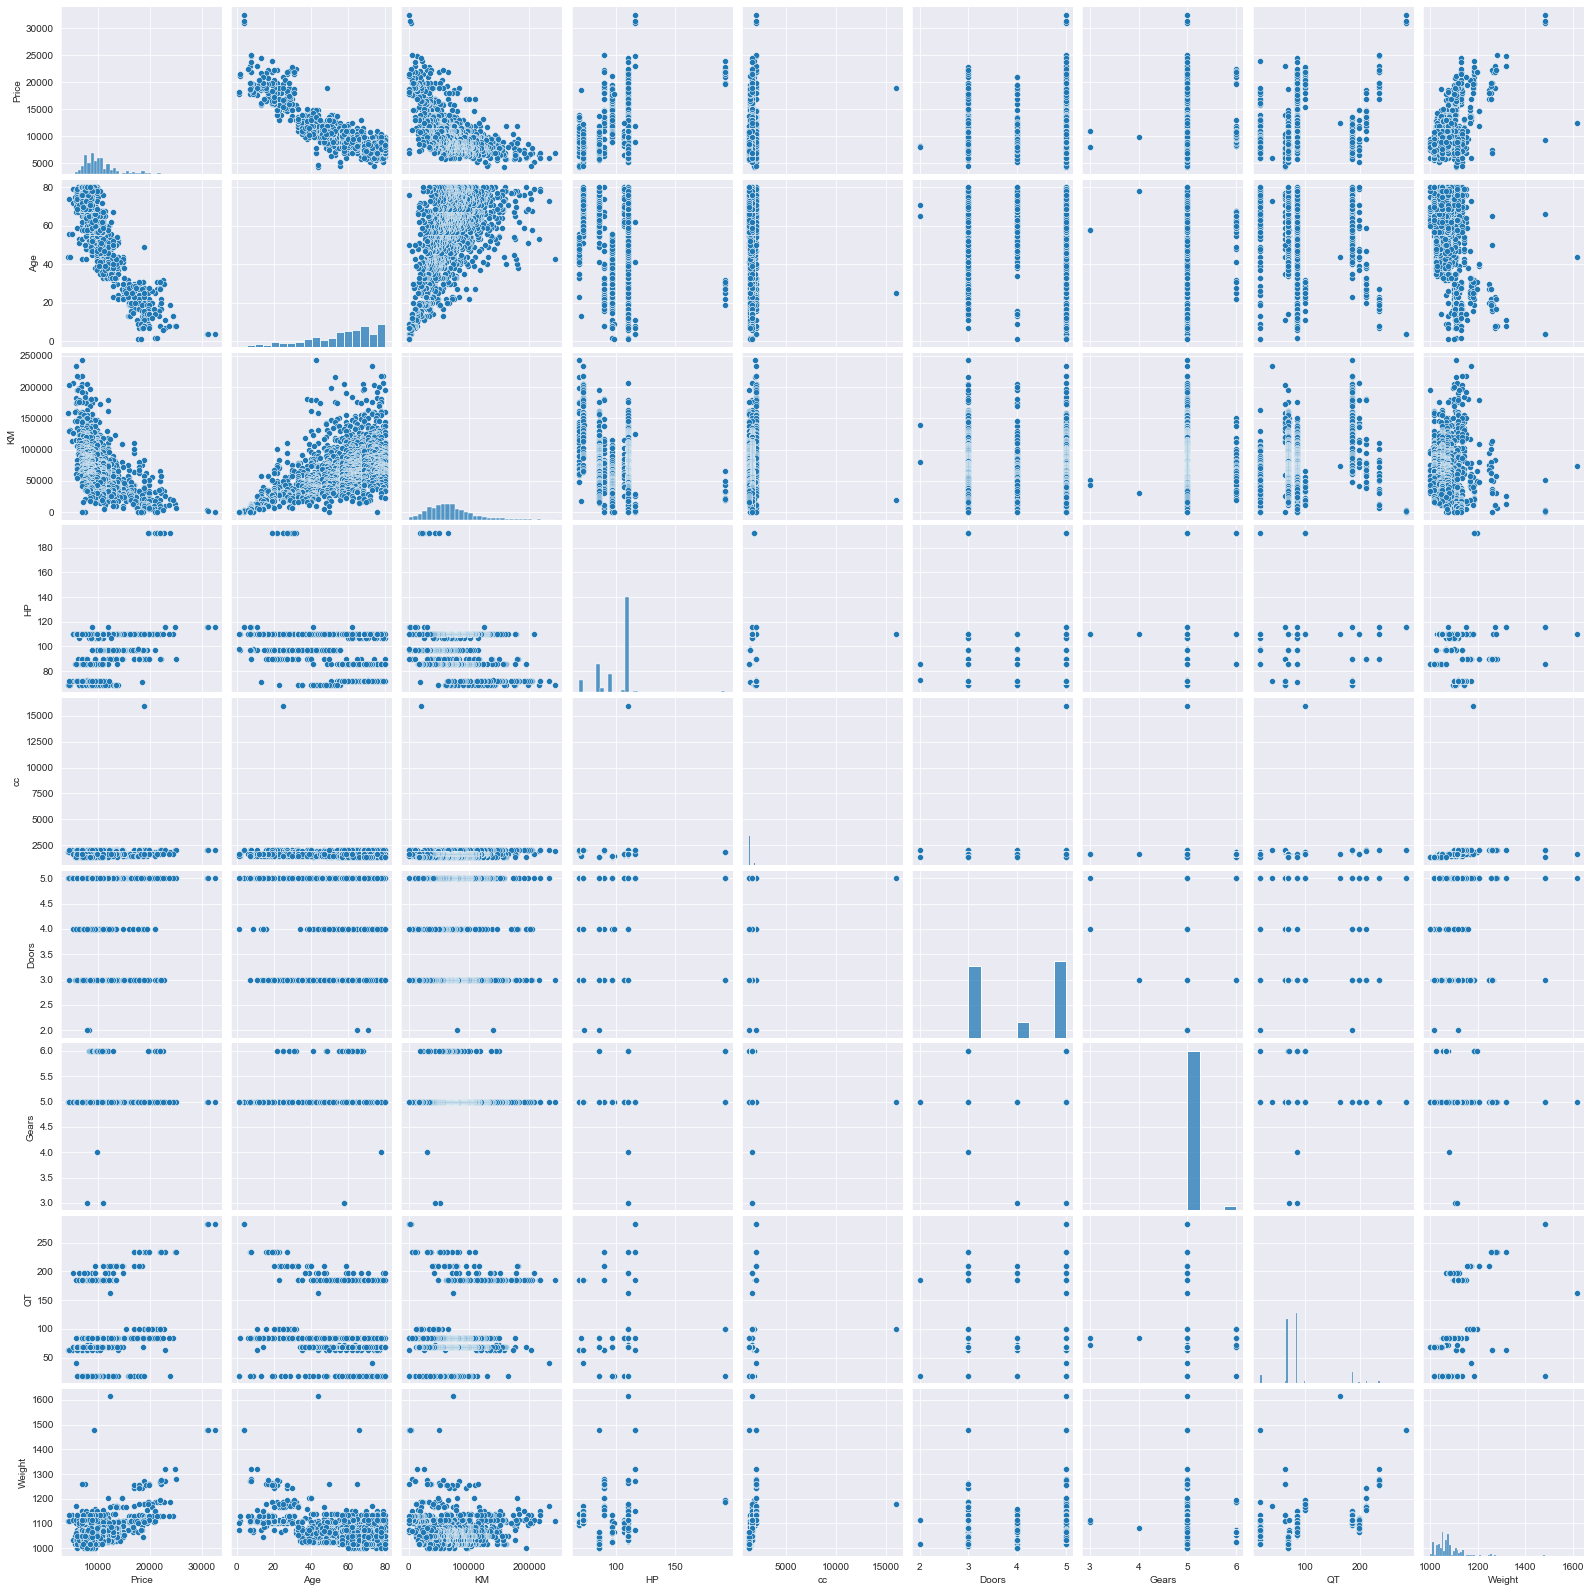

In [41]:
sns.set_style(style='darkgrid')
sns.pairplot(cars5)

In [42]:
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight',data=cars5).fit()

In [43]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
cc             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [44]:
print(model.tvalues, '\n', np.round(model.pvalues,5))

Intercept    -3.875273
Age         -46.551876
KM          -16.552424
HP           11.209719
cc           -1.316436
Doors        -0.023012
Gears         3.034563
QT            2.944198
Weight       15.760663
dtype: float64 
 Intercept    0.00011
Age          0.00000
KM           0.00000
HP           0.00000
cc           0.18824
Doors        0.98164
Gears        0.00245
QT           0.00329
Weight       0.00000
dtype: float64


In [45]:
(model.rsquared,model.rsquared_adj)

(0.8625200256947, 0.8617487495415146)

In [46]:
ml_cc=smf.ols('Price~cc',data = cars4).fit()
print(ml_cc.tvalues, '\n', ml_cc.pvalues) 

Intercept    24.694090
cc            4.824822
dtype: float64 
 Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


In [47]:
ml_doors=smf.ols('Price~Doors',data = cars4).fit()
print(ml_doors.tvalues, '\n', ml_doors.pvalues)

Intercept    19.258097
Doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


In [48]:
ml_cd=smf.ols('Price~cc+Doors',data = cars4).fit()  
print(ml_cd.tvalues, '\n', ml_cd.pvalues)

Intercept    12.620704
cc            4.340400
Doors         6.816153
dtype: float64 
 Intercept    1.056885e-34
cc           1.521992e-05
Doors        1.373469e-11
dtype: float64


In [49]:
rsq_age=smf.ols('Age~KM+HP+cc+Doors+Gears+QT+Weight',data=cars5).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+cc+Doors+Gears+QT+Weight',data=cars5).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+cc+Doors+Gears+QT+Weight',data=cars5).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('cc~Age+KM+HP+Doors+Gears+QT+Weight',data=cars5).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+cc+Gears+QT+Weight',data=cars5).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+cc+Doors+QT+Weight',data=cars5).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('QT~Age+KM+HP+cc+Doors+Gears+Weight',data=cars5).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age+KM+HP+cc+Doors+Gears+QT',data=cars5).fit().rsquared
vif_WT=1/(1-rsq_WT)

# Putting the values in Dataframe format
d1={'Variables':['Age','KM','HP','cc','Doors','Gears','QT','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df


,Variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


In [50]:
import statsmodels.api as sm

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


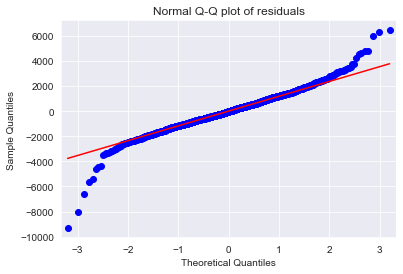

In [51]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [52]:
list(np.where(model.resid>6000))

[array([109, 146, 522], dtype=int64)]

In [53]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

In [54]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

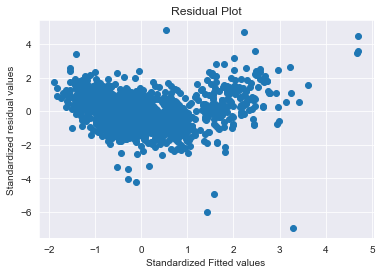

In [55]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [56]:
cars5.head(1)

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165


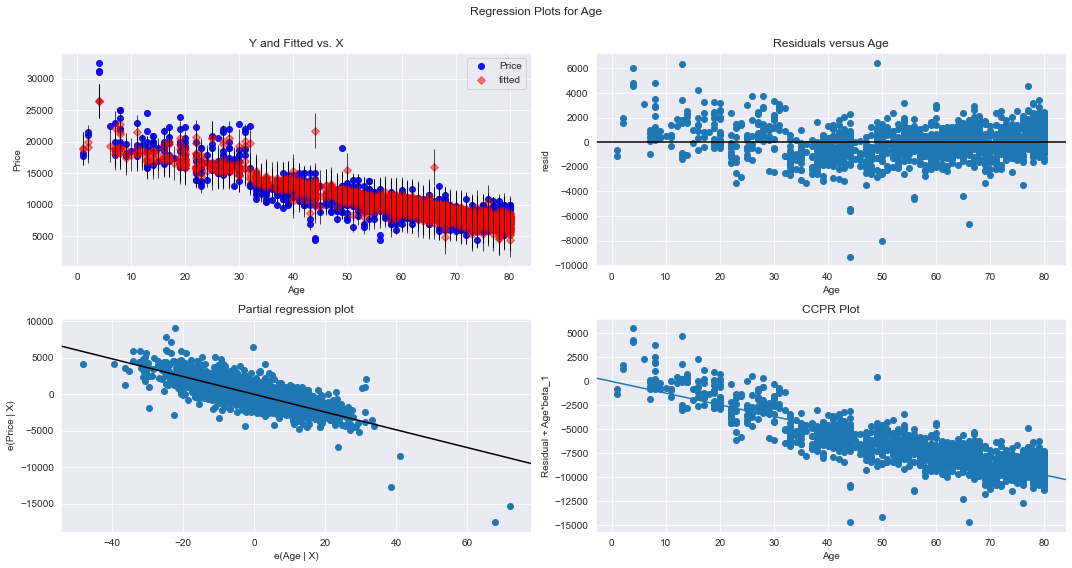

In [57]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

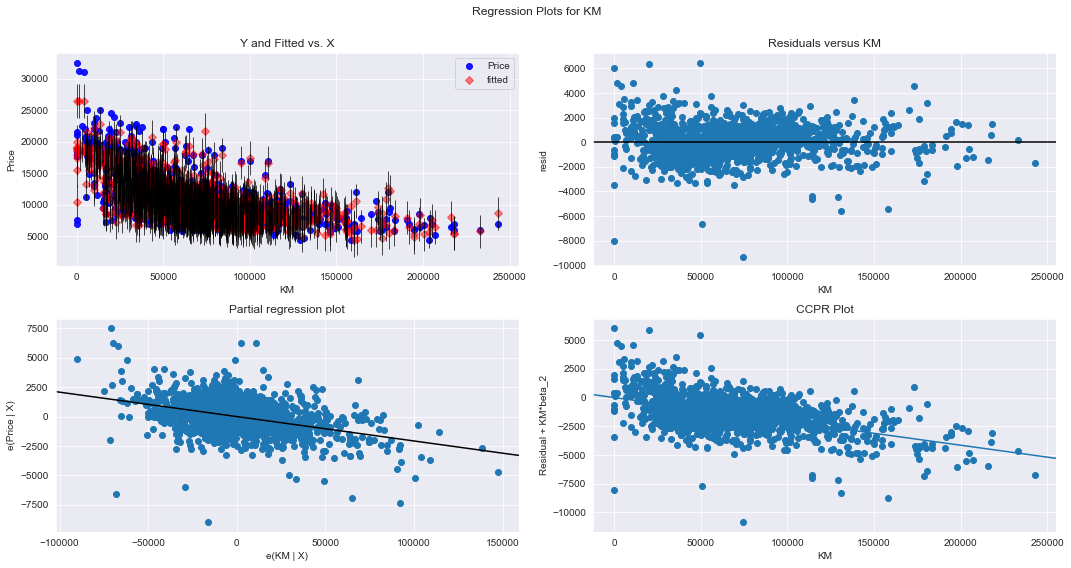

In [58]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

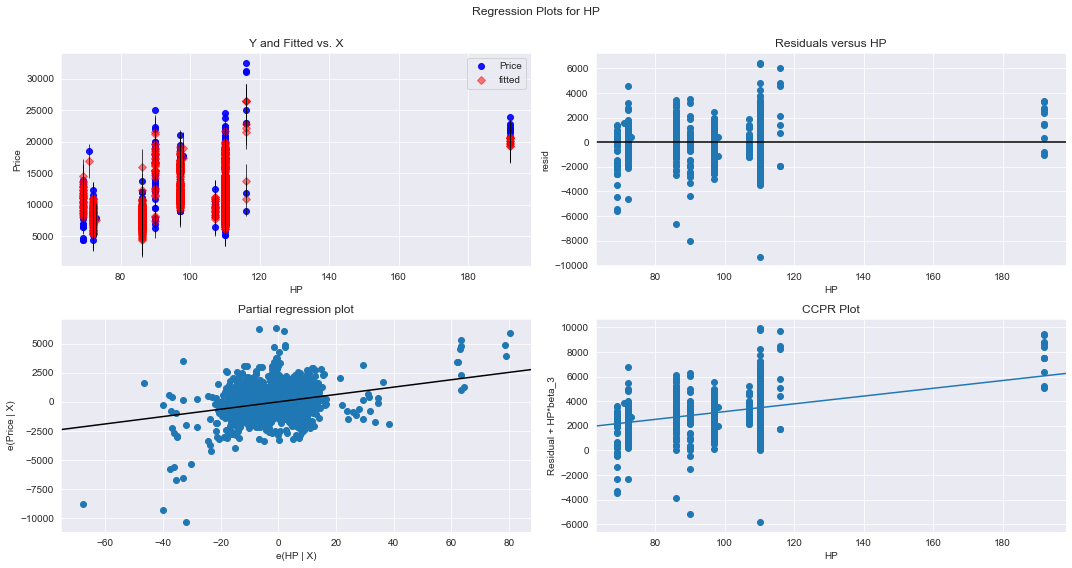

In [59]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

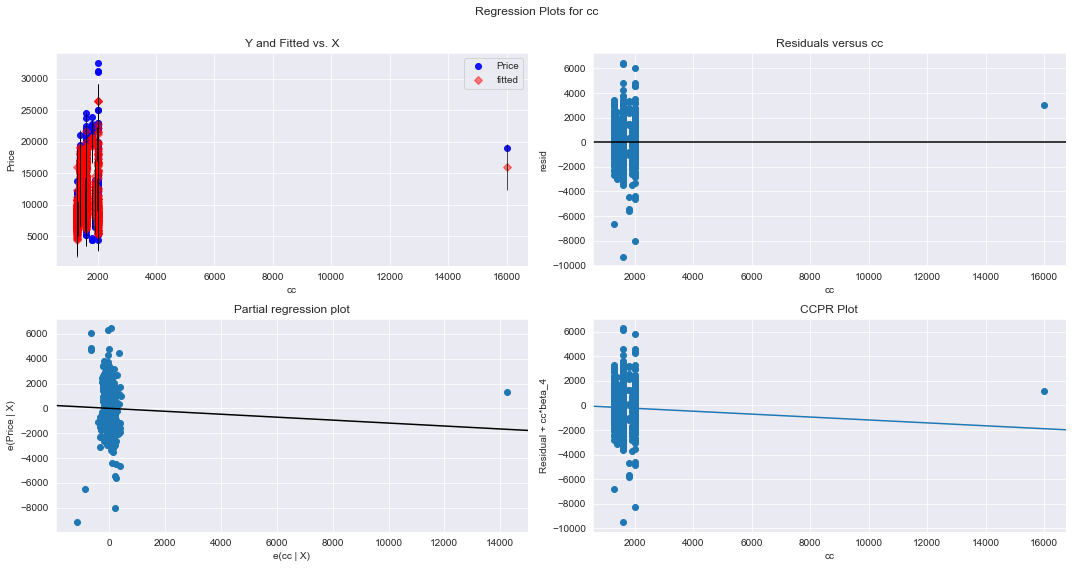

In [60]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

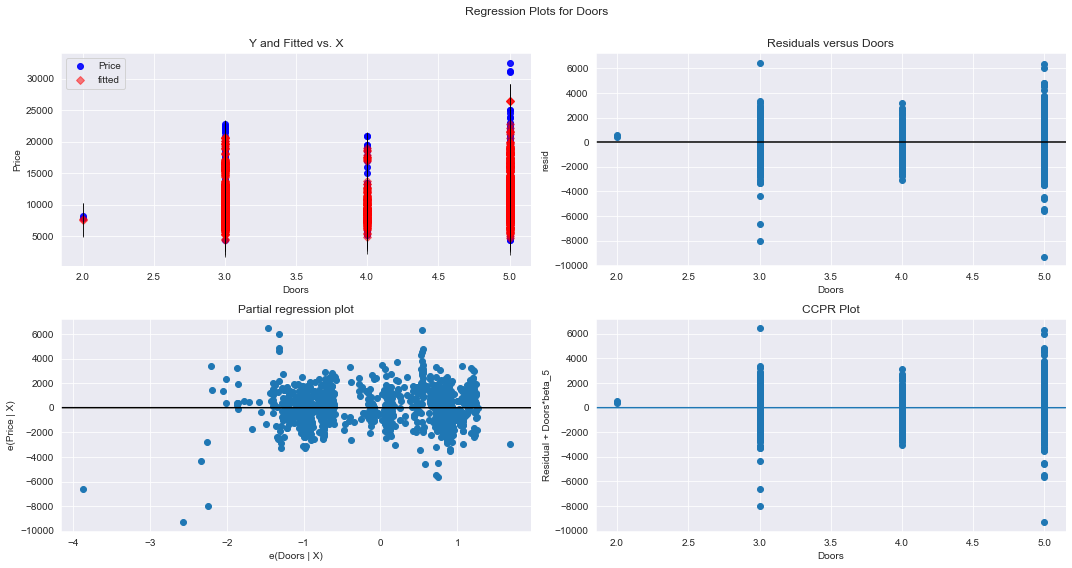

In [61]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

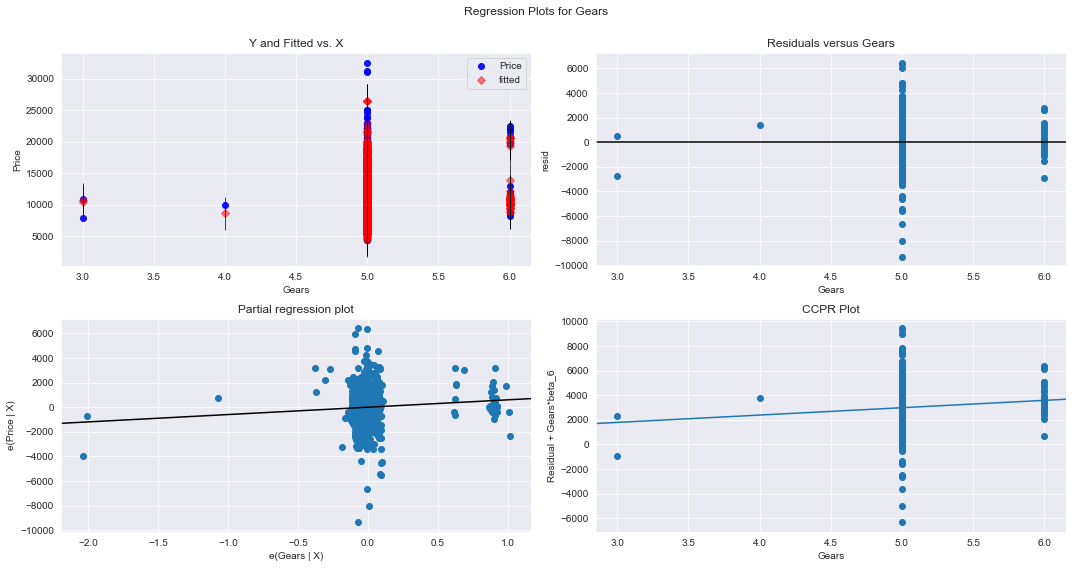

In [62]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

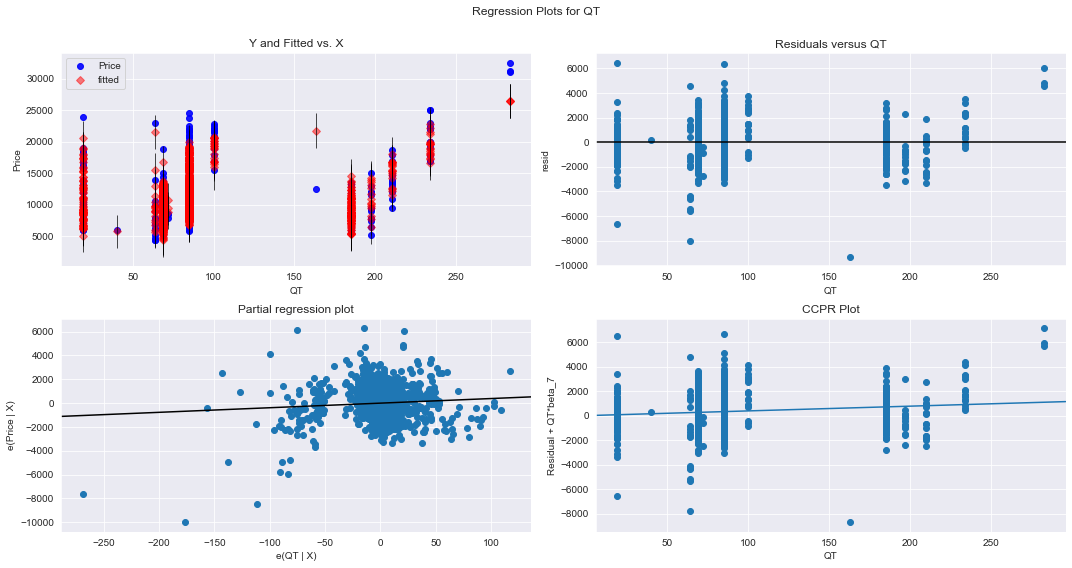

In [63]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "QT", fig=fig)
plt.show()

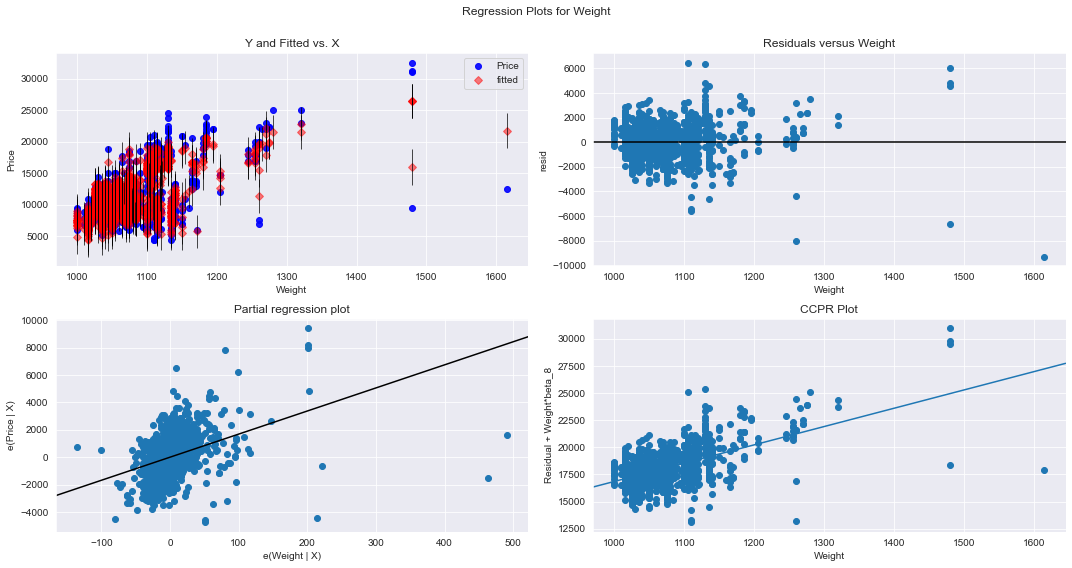

In [64]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

In [65]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

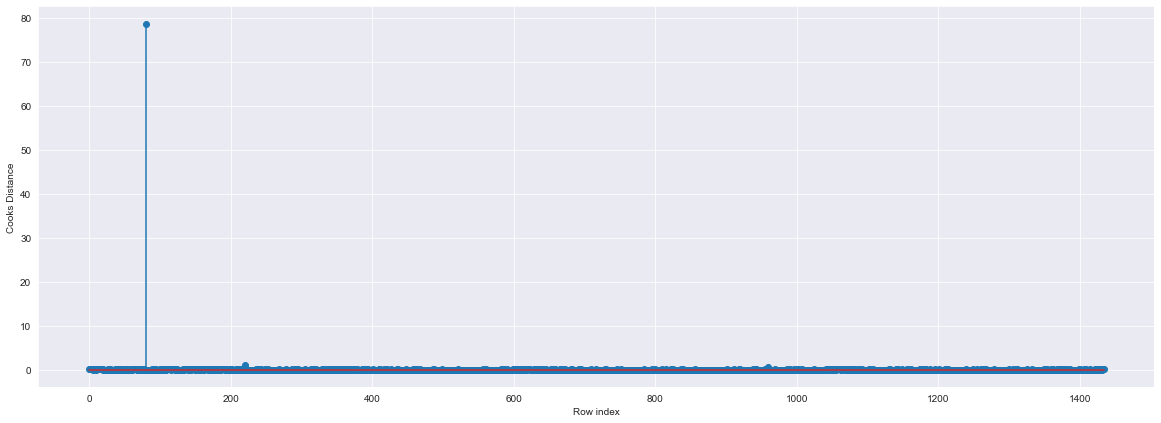

In [67]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars5)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [68]:
(np.argmax(c),np.max(c))

(80, 78.72950582247482)

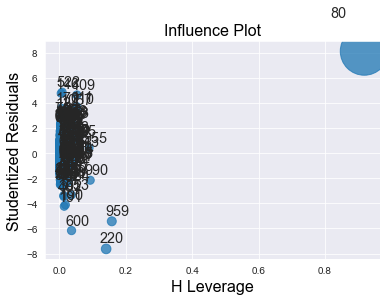

In [69]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [70]:
k = cars5.shape[1]
n = cars5.shape[0]
leverage_cutoff = 3*((k + 1)/n)


In [71]:
cars5[cars5.index.isin([80])]

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [72]:
cars5.head()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [73]:
cars_new=cars5.copy()

In [74]:
cars_new

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [75]:
cars6=cars_new.drop(cars_new.index[[80]],axis=0).reset_index()

In [76]:
cars6=cars6.drop(['index'],axis=1)

In [77]:
cars6

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [78]:
final_ml_D= smf.ols('Price~Age+KM+HP+Doors+Gears+QT+Weight',data = cars6).fit()

In [79]:
(final_ml_D.rsquared,final_ml_D.aic)

(0.8619510191654682, 24732.88159628498)

In [80]:
final_ml_C= smf.ols('Price~Age+KM+HP+cc+Gears+QT+Weight',data = cars6).fit()

In [81]:
(final_ml_C.rsquared,final_ml_C.aic)

(0.8680741306155819, 24667.8233300342)

In [82]:
model_influence_C = final_ml_C.get_influence()
(c_C, _) = model_influence_C.cooks_distance

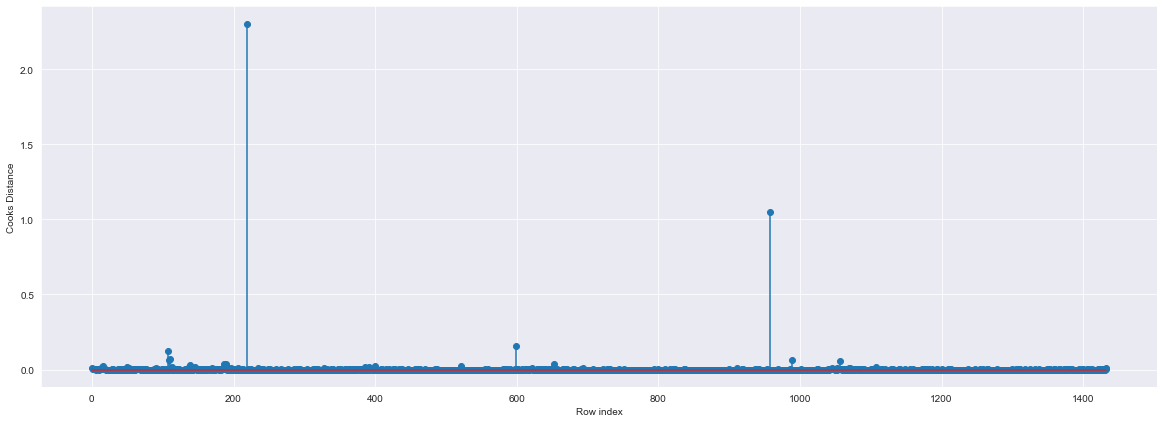

In [84]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(cars6)),np.round(c_C,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [85]:
(np.argmax(c_C),np.max(c_C))

(219, 2.3039534822935255)

In [86]:
cars7=cars6.drop(cars6.index[[219]],axis=0)

In [87]:
cars7

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [88]:
cars8=cars7.reset_index()

In [89]:
cars9=cars8.drop(['index'],axis=1)

In [90]:
cars9

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


In [91]:
final_ml_C= smf.ols('Price~Age+KM+HP+cc+Gears+QT+Weight',data = cars9).fit()

In [92]:
model_influence_C = final_ml_C.get_influence()
(c_C, _) = model_influence_C.cooks_distance

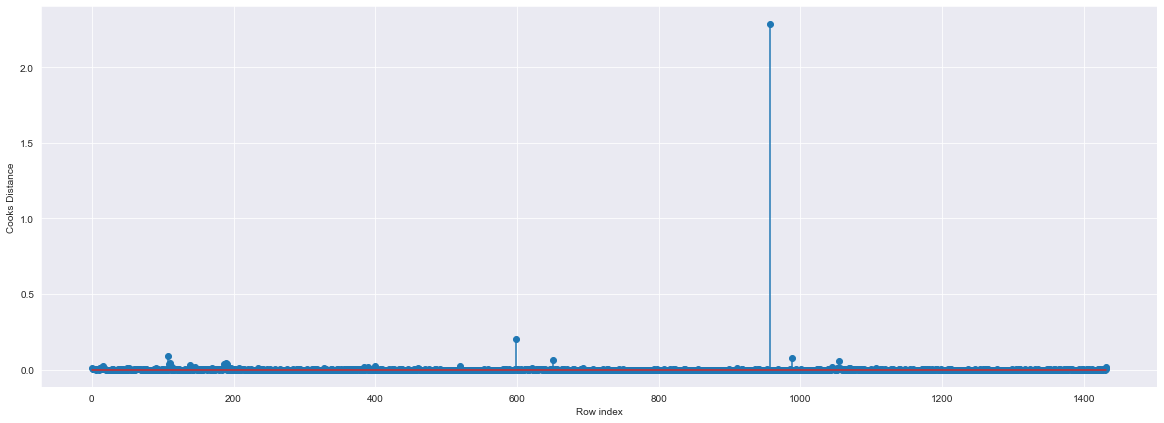

In [93]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(cars9)),np.round(c_C,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [94]:
(np.argmax(c_C),np.max(c_C))

(957, 2.289048255297468)

In [95]:
cars10=cars9.drop(cars6.index[[957]],axis=0)

In [96]:
cars11=cars10.reset_index()

In [97]:
cars12=cars11.drop(['index'],axis=1)

In [98]:
cars12

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1427,7500,69,20544,86,1300,3,5,69,1025
1428,10845,72,19000,86,1300,3,5,69,1015
1429,8500,71,17016,86,1300,3,5,69,1015
1430,7250,70,16916,86,1300,3,5,69,1015


In [99]:
final_ml_C= smf.ols('Price~Age+KM+HP+cc+Gears+QT+Weight',data = cars12).fit()

In [100]:
model_influence_C = final_ml_C.get_influence()
(c_C, _) = model_influence_C.cooks_distance

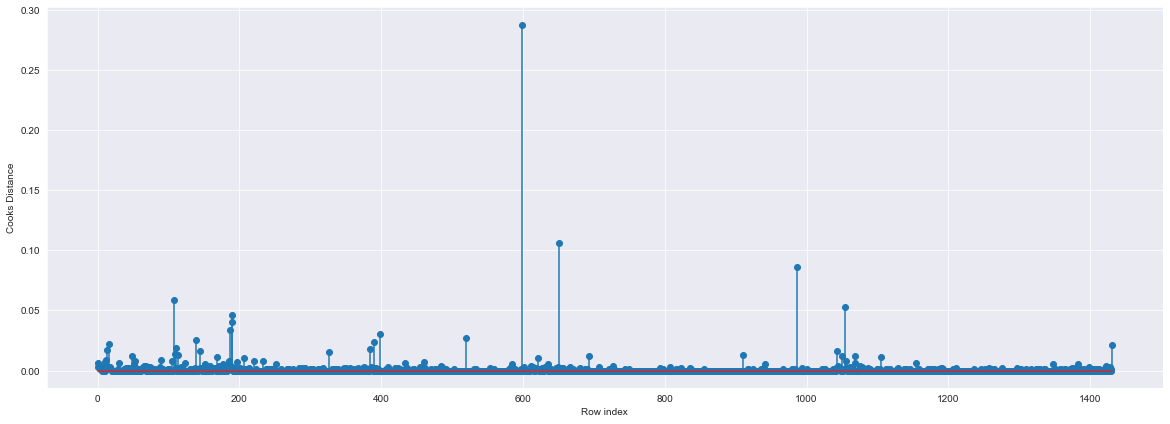

In [101]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(cars12)),np.round(c_C,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [102]:
(final_ml_C.rsquared,final_ml_C.aic)

(0.8831056250413849, 24461.84500029223)

In [103]:
cars12.head()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [104]:
new_data=pd.DataFrame({'Age':23,"KM":72937,"HP":90,"cc":2000,"Doors":3,"Gears":5,"QT":210,"Weight":1165},index=[1])

In [105]:
final_ml_C.predict(new_data)

1    15746.258459
dtype: float64

In [106]:
pred_y = final_ml_C.predict(cars_new)

In [107]:
pred_y

0       16192.554974
1       15746.258459
2       16170.822941
3       15837.767454
4       15697.459551
            ...     
1430     9024.411979
1431     8421.389876
1432     8567.959734
1433     8682.129197
1434    10681.447575
Length: 1435, dtype: float64